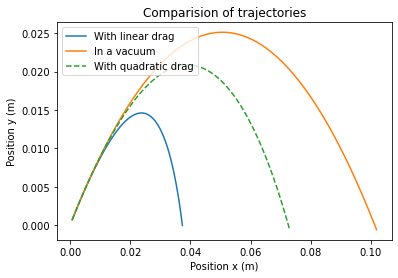

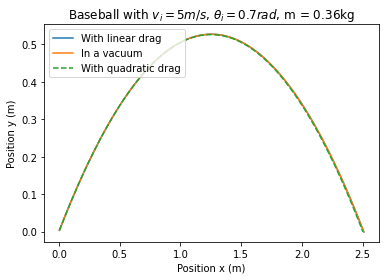

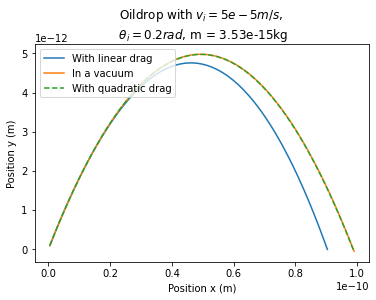

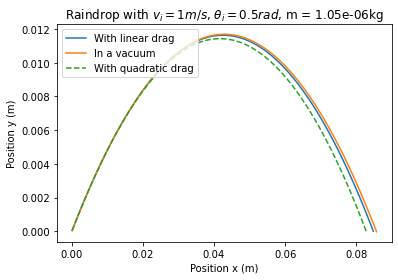

In [42]:
import matplotlib.pyplot as plt
import math
import numpy as np

# setting parameters
g = -9.81
D = [1.e-4,0.07, 1.5e-6, 0.001]
rho = 2000 
B = 1.6e-4
dt = [0.001,0.001,0.00000001,0.0001]
tmax = 10 #seconds# initial conditions
theta =[math.pi/4,0.7,0.2,0.5]
C = 0.25
titles = ["Comparision of trajectories",
          "Baseball with $v_i=5m/s$, $θ_i=0.7rad$, m = 0.36kg", 
          "Oildrop with $v_i=5e-5m/s$, \n $θ_i=0.2rad$, m = 3.53e-15kg",
          "Raindrop with $v_i=1m/s$, $θ_i=0.5rad$, m = 1.05e-06kg"]
iv = [1, 5, 5e-5, 1]

for i in range(4):
    volume = (4.0/3.0) * math.pi * (D[i]/2.0)**3
    m = rho * volume
    b = B*D[i]
    c = C * D[i]**2 
    #In the following section of code the calculations for an object's postions is analyzed outside a vacuum (with drag)    
    #Linear drag:
    vw = iv[i]
    tw = 0
    tlw = [tw]

    yw = 0
    xw = 0

    vxw = vw * np.cos(theta[i])
    vyw = vw * np.sin(theta[i])

    vxwl = []
    vywl = []

    # Iteratively updating position using the equations of motion in a case with drag
    while (yw >=0):
        dvxw = - (b/m)*vxw*dt[i]
        dvyw = g*dt[i] - (b/m)*vyw*dt[i]
        vxw = vxw + dvxw
        vyw = vyw + dvyw
        dxw = vxw * dt[i]
        dyw = vyw * dt[i]
        xw = xw + dxw
        yw = yw + dyw

        vxwl.append(xw)
        vywl.append(yw)
        tw = tw + dt[i]


    #In the following section of code the calculations for an object's postions is analyzed in a vacuum (no drag)    
    #No Drag intial conditions
    vn = iv[i]
    tn = 0
    tln = [tn]

    yn = 0
    xn = 0

    vxn = vn * np.cos(theta[i])
    vyn = vn * np.sin(theta[i])

    vxnl = []
    vynl = []

    # Iteratively updating position using the equations of motion in vacuum case
    while (yn >=0):
        dvxn = 0 
        dvyn = g*dt [i]
        vxn = vxn + dvxn
        vyn = vyn + dvyn
        dxn = vxn * dt[i]
        dyn = vyn * dt[i]
        xn = xn + dxn
        yn = yn + dyn

        vxnl.append(xn)
        vynl.append(yn)

        tn = tn + dt[i]

    #Quadratic Drag:
    vq = iv[i]
    tq = 0
    tlq = [tq]

    yq = 0
    xq = 0

    vxq = vq * np.cos(theta[i])
    vyq = vq * np.sin(theta[i])

    vxql = []
    vyql = []

    # Iteratively updating position using the equations of motion in a case with drag
    while (yq >=0):
        sqv = math.sqrt(vxq**2+vyq**2)
        dvxq = - (c/m)*sqv*dt[i]
        dvyq = g*dt[i] - (c/m)*sqv*dt[i]
        vxq = vxq + dvxq
        vyq = vyq + dvyq
        dxq = vxq * dt[i]
        dyq = vyq * dt[i]
        xq = xq + dxq
        yq = yq + dyq

        vxql.append(xq)
        vyql.append(yq)
        tq = tq + dt[i]


    plt.figure()
    plt.plot(vxwl,vywl,'-',label="With linear drag")
    plt.plot(vxnl,vynl,'-',label="In a vacuum")
    plt.plot(vxql,vyql,'--',label="With quadratic drag")
    plt.legend(loc = 'upper left')
    plt.xlabel('Position x (m)')
    plt.ylabel('Position y (m)')
    plt.title(titles[i])
    plt.show()


                       